## P1
Małgorzata Kurcjusz-Gzowska 

In [10]:
import math
import matplotlib.pyplot as plt

#### P1.1 Draw square lattice with your own implementation (not build-in in some library) [1.5P]

In [224]:
def square_lattice_coords(rows=5, cols=5, spacing=1.0):
    # points coordinates (i,j)
    points = []
    for i in range(rows):
        for j in range(cols):
            points.append((j*spacing, i*spacing))  # x=j, y=i
    return points

def square_lattice_edges(rows=5, cols=5):
    # edge list as pairs indexes of points
    edges = []
    for i in range(rows):
        for j in range(cols):
            idx = i*cols + j # index
            if j+1 < cols:          # right connection
                edges.append((idx, i*cols + (j+1)))
            if i+1 < rows:          # down connection
                edges.append((idx, (i+1)*cols + j))
    return edges

In [225]:
def draw_square_lattice(rows=5, cols=5, spacing=1.0):
    pts = square_lattice_coords(rows, cols, spacing)
    edges = square_lattice_edges(rows, cols)

    # edges
    for a, b in edges:
        x1, y1 = pts[a]
        x2, y2 = pts[b]
        plt.plot([x1, x2], [y1, y2], linewidth=1, color = "gray")

    # points
    xs = [p[0] for p in pts]
    ys = [p[1] for p in pts]
    plt.scatter(xs, ys, s=30, color = "salmon")

    plt.gca().set_aspect('equal', adjustable='box') # equal units on axes x,y with use of chatGPT
    plt.axis('off')
    plt.tight_layout()
    plt.title("Square lattice")
    plt.show()

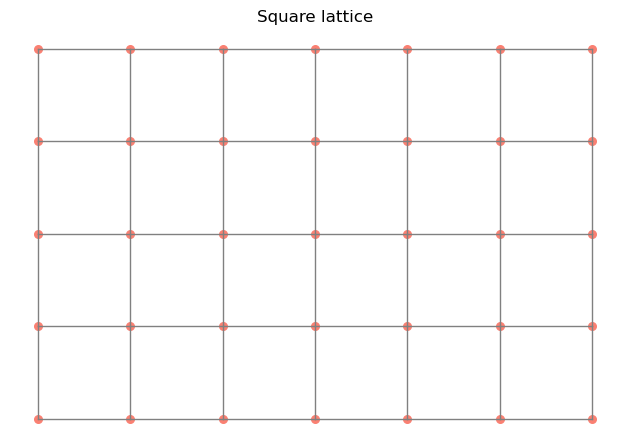

In [226]:
draw_square_lattice(rows=5, cols=7, spacing=1.0)

#### P1.2 Draw chain with your own implementation (not build-in in some library). [1P]

In [227]:
def draw_chain(n_nodes=6, spacing=1.0, origin=(0.0, 0.0), closed=False,
               node_size=50, line_width=2.0, margin=0.5):

    ox, oy = origin

    # generating points:
    points = []
    for i in range(n_nodes):
        x = ox + i * spacing
        y = oy
        points.append((x, y))
    #generating edges:
    edges = []
    for i in range(n_nodes - 1):
        edges.append((i, i + 1))
    if closed and n_nodes > 2:
        edges.append((n_nodes - 1, 0))

    print(f'points: {points} \nedges: {edges}')

    
    # drawing chain:
    fig, ax = plt.subplots(figsize=(8, 2))

    #egdes
    for i, j in edges:
        (x1, y1), (x2, y2) = points[i], points[j]
        ax.plot([x1, x2], [y1, y2], linewidth=line_width, color="gray")

    # points
    xs, ys = zip(*points) # separates list of (x, y) points into two lists (xs and ys) - with use of chat GPT
    ax.scatter(xs, ys, s=node_size, zorder=3, color="salmon")

    ax.axis('off')
    ax.set_title("Chain")
    plt.show()

points: [(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)] 
edges: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]


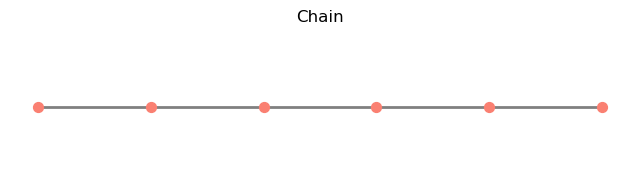

In [212]:
draw_chain(n_nodes=6, spacing=1.0, closed=False)

#### P1.3 Draw complete graph with your own implementation (not build-in in some library). [1P]

In [145]:
def draw_complete_graph(n_nodes=6, radius=3, node_size=100, line_width=1.2):

    
    # generatin points:
    points = []
    for i in range(n_nodes):
        angle = 2 * math.pi * i / n_nodes
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        points.append((x, y))
    
    # generating edges:
    edges = []
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            edges.append((i, j))
    
    print(f'points: {points} \nedges: {edges}')

    
    #drawing
    fig, ax = plt.subplots(figsize=(4, 4))

    # edges
    for i, j in edges:
        (x1, y1), (x2, y2) = points[i], points[j]
        ax.plot([x1, x2], [y1, y2], color='gray', linewidth=line_width, zorder=1)

    # points
    xs, ys = zip(*points)
    ax.scatter(xs, ys, s=node_size, color='salmon', zorder=2)

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title("Complete Graph")
    plt.show()


points: [(3.0, 0.0), (0.9270509831248424, 2.8531695488854605), (-2.427050983124842, 1.7633557568774196), (-2.4270509831248424, -1.7633557568774192), (0.9270509831248417, -2.853169548885461)] 
edges: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


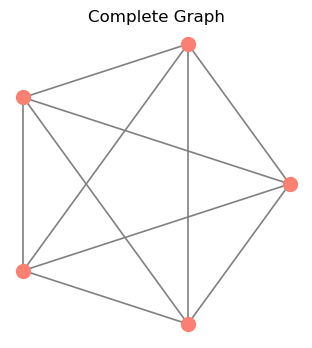

In [146]:
draw_complete_graph(n_nodes=5)

#### P1.4 Draw weighted graph (any, but N>5). [1P]

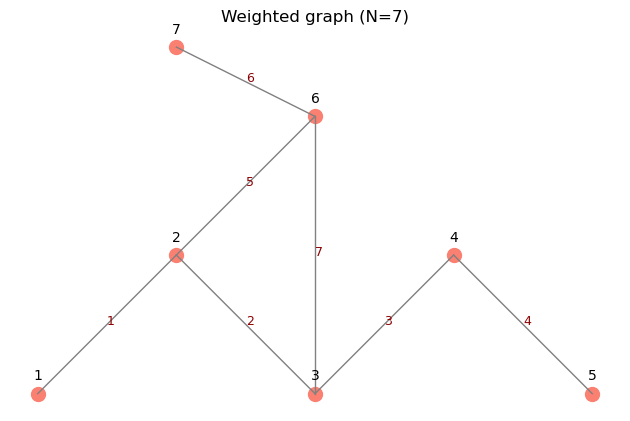

In [230]:
# vertices (x, y)
points = {
    1: (0, 0),
    2: (1, 1),
    3: (2, 0),
    4: (3, 1),
    5: (4, 0),
    6: (2, 2),
    7: (1, 2.5)
}

# edges: (start, end, weights)
edges = [
    (1, 2, 1),
    (2, 3, 2),
    (3, 4, 3),
    (4, 5, 4),
    (2, 6, 5),
    (6, 7, 6),
    (3, 6, 7)
]

# edges
for a, b, w in edges:
    x1, y1 = points[a]
    x2, y2 = points[b]
    plt.plot([x1, x2], [y1, y2], 'gray', linewidth=1)
    plt.text((x1 + x2) / 2, (y1 + y2) / 2, str(w), color='darkred', fontsize=9)

# vertices
for node, (x, y) in points.items():
    plt.scatter(x, y, color='salmon', s=100)
    plt.text(x, y + 0.1, str(node), ha='center', fontsize=10)

plt.gca().set_aspect('equal', adjustable='box') # this line was written with help of chat gpt
plt.axis('off')
plt.title("Weighted graph (N=7)")
plt.tight_layout()
plt.show()


#### P1.6 Compute vertex degrees for one of the above graphs. [1P]

Vertex degrees for weighted graph: 

In [231]:
# calculating the degrees of vertices
degree = {v: 0 for v in points.keys()}  

for a, b, w in edges:
    degree[a] += 1
    degree[b] += 1  # because not directed graph

# results
for v, d in degree.items():
    print(f"Vertex {v}: degree = {d}")


Vertex 1: degree = 1
Vertex 2: degree = 3
Vertex 3: degree = 3
Vertex 4: degree = 2
Vertex 5: degree = 1
Vertex 6: degree = 3
Vertex 7: degree = 1


#### P1.5 Draw directed graph (any, but N>5). [1P]

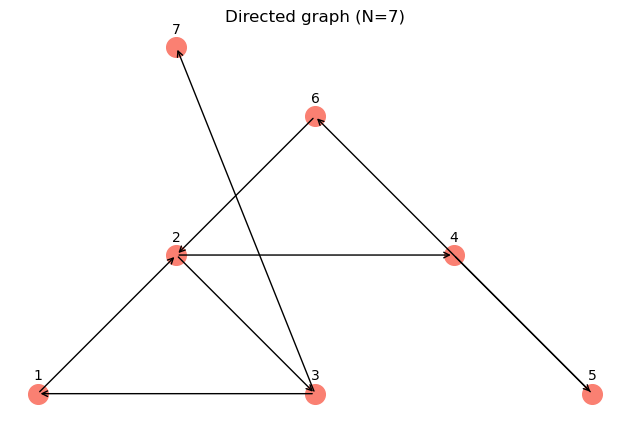

In [233]:
# vertices coordinates (x, y)
points = {
    1: (0, 0),
    2: (1, 1),
    3: (2, 0),
    4: (3, 1),
    5: (4, 0),
    6: (2, 2),
    7: (1, 2.5)
}

# directed edges (u -> v)
edges = [
    (1, 2), (2, 3), (3, 1),     # cycle
    (2, 4), (4, 5), (5, 6), (6, 2),  # second cycle
    (3, 7)
]

# vertices
for n, (x, y) in points.items():
    plt.scatter(x, y, s=200, color="salmon")
    plt.text(x, y + 0.1, str(n), ha='center')

# edges = arrows
for u, v in edges:
    x1, y1 = points[u]
    x2, y2 = points[v]
    plt.annotate( # this was written with help of chat gpt
        "", xy=(x2, y2), xytext=(x1, y1),
        arrowprops=dict(arrowstyle="->", lw=1)
    )

plt.gca().set_aspect('equal', adjustable='box') # this line was written with help of chat gpt
plt.axis('off')
plt.title("Directed graph (N=7)")
plt.tight_layout()
plt.show()
